# Assessment Preparation Challenge

- These challenges are optional, are not marked and are just for you.
- But they will prepare you for the course’s final assesment. If you complete all of the challenges, you will have a much easier to do the final assesment.
- you will **NOT** be given answers to them, because large parts of the assesment will be very simmilar and if we gave you the answers you could copy-paste parts of it for assesment which would defeat the purpose of the assesment :)

In [1]:
# run this at the beginning of the class to load all dependancies 
# (you can run things with Shift+Enter keyboard shortcut, or with the RUN button above)

import networkx as nx
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pprint as pp
import requests
import networkx as nx
import matplotlib.pyplot as plt

## Challange 3: Given a twitter following of 'company X' what can you deduce from the data?

```
note that this exercise is highly exploratory and is rather about you playing with data, than achieving any particular goal.
```

Read and diagram the contents of the file `twitter_followers_of_company_x.csv`. 

It contains anonymised twitter followers of a certain data science related institution in Edinburgh. In the data the company we 'work for' is encoded as companyX.

- look at the measurements, what can they tell you? Are some nodes more important? In what way?
- what if you limit the data to just some subset of it?
- can you try to program something you learned during the lectures about social networks?

**Use code from parts of code from this week's notebooks to help you.**

Have a look at the data. Format of the data is accound_id, followed by people who follow them (twitter calls it their 'friends').

some_user_x, account_that_follows_x, another_account_that_follows_x, another_account_that_follows_x, So for example

```
company_x,oyster_marshmallow,ruby_hogbean,cherry_basil
dollar_meadowsweet,banana_marshmallow,cherry_basil
cherry_basil,banana_marshmallow
banana_marshmallow
```
means that 3 accounts follow company_x. But no-one follows banana_marshmallow.

**Note that this file is rather large (500 accounts) so generating even a simple graph will take a while. (a minute, or more)** If you cannot accept the speed of `networkx`, you can consider `graph-tool` (https://graph-tool.skewed.de/static/doc/quickstart.html), which is much faster than `networkx`.

you might choose to filter it and keep only some accounts. (eg. the ones with company_x, or the ones with more followers than some number) to speed up the process.

In [2]:
G = nx.read_adjlist('twitter_followers_of_company_x.csv', delimiter=",", create_using=nx.DiGraph())
# note, without  create_using=nx.DiGraph() you might not see any edges at this scale

degree = nx.degree_centrality(G)
pp.pprint(degree)

{'alabaster_acacia': 0.2693877551020408,
 'alabaster_foxglove': 0.16938775510204082,
 'alabaster_hepatica': 0.08979591836734695,
 'alabaster_marshmallow': 0.32040816326530613,
 'amber_aloe': 0.20816326530612247,
 'amber_bluebottle': 0.22244897959183677,
 'amber_burdock': 0.20408163265306123,
 'amber_foxglove': 0.08775510204081634,
 'apple_ash': 0.32040816326530613,
 'apple_bryony': 0.15510204081632656,
 'apple_bugloss': 0.5510204081632654,
 'apple_hyacinth': 0.3020408163265306,
 'apple_milfoil': 0.19387755102040818,
 'apple_motherwort': 0.2510204081632653,
 'apple_mugwort': 0.08571428571428572,
 'apricot_aloe': 0.45102040816326533,
 'apricot_hornbeam': 0.4795918367346939,
 'apricot_milfoil': 0.11224489795918369,
 'apricot_milkwort': 0.22244897959183677,
 'apricot_motherwort': 0.16122448979591839,
 'banana_bramble': 0.21020408163265308,
 'banana_fennel': 0.2448979591836735,
 'banana_hollyhock': 0.4755102040816327,
 'banana_honeysuckle': 0.48367346938775513,
 'banana_hornbeam': 0.3816326

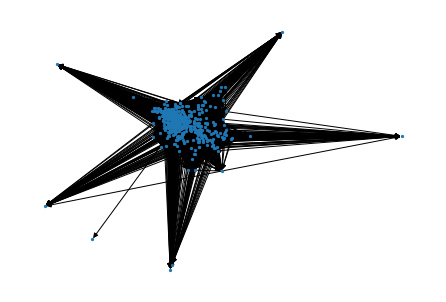

In [3]:
pos = nx.spring_layout(G)

nx.draw(G, pos, node_size = 5, width = 1)
plt.show()

In [4]:
# hint. for filtering, you can use Dictionary comprehension.
# ir works just like List comprehension but on tupples (key, value) pairs

some_accounts_degree = {'alabaster_acacia': 0.2693877551020408,
 'alabaster_foxglove': 0.16938775510204082,
 'alabaster_hepatica': 0.08979591836734695,
 'alabaster_marshmallow': 0.32040816326530613,
 'amber_aloe': 0.20816326530612247 }

high_degree_accounts = { key:value 
                         for (key,value) in some_accounts_degree.items()
                         if value > 0.2 }
high_degree_accounts

{'alabaster_acacia': 0.2693877551020408,
 'alabaster_marshmallow': 0.32040816326530613,
 'amber_aloe': 0.20816326530612247}